# 1

## The formation of gridworld:

In [ ]:
import numpy as np
import gym
from gym import spaces
from IPython.display import Image

class GridWorldEnv(gym.Env):
    """
    Custom Environment that follows gym interface.
    """
    metadata = {'render.modes': ['console']}

    def __init__(self, reward, total_traj = 0):
        super(GridWorldEnv, self).__init__()

        # Size of the 2D-grid
        self.reward = reward
        self.H, self.W = self.reward.shape
        # Initialize the agent at the right bottom of the grid
        self.agent_pos = np.array([self.H-1, self.W-1]).astype(np.float32)
        self.moves = {
            0: np.array([0, -1]),
            1: np.array([0, 1]),
            2: np.array([-1, 0]),
            3: np.array([1, 0])
        }
        self.traj = total_traj
        self.total_traj = total_traj

        # Define action and observation space
        # They must be gym.spaces objects
        # Example when using discrete actions, we have 4: left, right, up, down
        n_actions = 4
        self.action_space = spaces.Discrete(n_actions)
        # The observation will be the coordinate of the agent
        # this can be described both by Discrete and Box space
        self.observation_space = spaces.Box(low=np.array([0, 0]), high=np.array([self.H, self.W]), dtype=np.float32)

    def reset(self):
        """
        Important: the observation must be a numpy array
        :return: (np.array) 
        """
        # Initialize the agent at the right bottom of the grid
        # here we convert to float32 to make it more general (in case we want to use continuous actions)
        self.agent_pos = np.array([self.H-1, self.W-1]).astype(np.float32)
        self.traj = self.total_traj

        return self.agent_pos

    def step(self, action):

        delta = self.moves[action]
        # IF REACH BOUNDARY: STAY STILL WITH REWARD = -1.
        # ELSE: MOVE TO NEW LOC AND RECEIVE REWARD
        if np.min(self.agent_pos + delta) < 0.0:
            rw = -1.0
        elif np.max(self.agent_pos + delta - np.array([self.H, self.W])) >= 0.0:
            rw = -1.0    
        else:
            # FOR SUTTONBARTO GRIDWORLD ESPECIALLY: MOVE TO A' AND B'
            x_c, y_c = self.agent_pos
            if x_c == 0 and y_c == 1:
                self.agent_pos += np.array([4, 0])
                rw = 10.0
            elif x_c == 0 and y_c == 3:
                self.agent_pos += np.array([2, 0])
                rw = 5.0
            else:
                self.agent_pos = self.agent_pos + delta
                rw = self.reward[int(self.agent_pos[0]), int(self.agent_pos[1])]
            
        self.traj = self.traj - 1
        done = bool(self.traj == 0)

        info = {}
        return self.agent_pos, rw, done, info

    def render(self, mode='console'):
        if mode != 'console':
            raise NotImplementedError()

        for i in range(self.H):
            for j in range(self.W):
                if self.agent_pos[0] == i and self.agent_pos[1] == j:
                    print('*', end = '')
                else:
                    print('.', end = '')
            print()

    def close(self):
        pass

## Test env

In [ ]:
def env_fn():
    my_reward = np.zeros((5, 5))
    
    env = GridWorldEnv(my_reward, 0)
    env.seed(38)
    
    return env

class RandomAgent(object):
    """The world's simplest agent!"""
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

if __name__ == '__main__':

    env = env_fn()

    obs = env.reset()
    env.render()

    agent = RandomAgent(env.action_space)

    reward = 0
    done = False
    
    n_steps = 20
    for step in range(n_steps):
        print("Step {}".format(step + 1))
        action = agent.act(obs, reward, done)
        obs, reward, done, info = env.step(action)
        print('action=', action, 'obs=', obs, 'reward=', reward, 'done=', done)
        env.render()
        if done:
            print("Goal reached!", "reward=", reward)
            break

    env.close()

## Test output

NOTE: '*' denotes the current position

In [ ]:
'''
.....
.....
.....
.....
....*
Step 1
action= 1 obs= [4. 4.] reward= -1.0 done= False
.....
.....
.....
.....
....*
Step 2
action= 3 obs= [4. 4.] reward= -1.0 done= False
.....
.....
.....
.....
....*
Step 3
action= 2 obs= [3. 4.] reward= 0.0 done= False
.....
.....
.....
....*
.....
Step 4
action= 2 obs= [2. 4.] reward= 0.0 done= False
.....
.....
....*
.....
.....
Step 5
action= 3 obs= [3. 4.] reward= 0.0 done= False
.....
.....
.....
....*
.....
Step 6
action= 3 obs= [4. 4.] reward= 0.0 done= False
.....
.....
.....
.....
....*
Step 7
action= 1 obs= [4. 4.] reward= -1.0 done= False
.....
.....
.....
.....
....*
Step 8
action= 2 obs= [3. 4.] reward= 0.0 done= False
.....
.....
.....
....*
.....
Step 9
action= 3 obs= [4. 4.] reward= 0.0 done= False
.....
.....
.....
.....
....*
Step 10
action= 3 obs= [4. 4.] reward= -1.0 done= False
.....
.....
.....
.....
....*
Step 11
action= 0 obs= [4. 3.] reward= 0.0 done= False
.....
.....
.....
.....
...*.
Step 12
action= 0 obs= [4. 2.] reward= 0.0 done= False
.....
.....
.....
.....
..*..
Step 13
action= 2 obs= [3. 2.] reward= 0.0 done= False
.....
.....
.....
..*..
.....
Step 14
action= 0 obs= [3. 1.] reward= 0.0 done= False
.....
.....
.....
.*...
.....
Step 15
action= 1 obs= [3. 2.] reward= 0.0 done= False
.....
.....
.....
..*..
.....
Step 16
action= 1 obs= [3. 3.] reward= 0.0 done= False
.....
.....
.....
...*.
.....
Step 17
action= 1 obs= [3. 4.] reward= 0.0 done= False
.....
.....
.....
....*
.....
Step 18
action= 2 obs= [2. 4.] reward= 0.0 done= False
.....
.....
....*
.....
.....
Step 19
action= 1 obs= [2. 4.] reward= -1.0 done= False
.....
.....
....*
.....
.....
Step 20
action= 0 obs= [2. 3.] reward= 0.0 done= False
.....
.....
...*.
.....
.....
'''

# 2

## Estimate state value

In [ ]:
def estStateVal(lr = 0.05, max_iter = 20000):

    env = env_fn()
    s_table = np.random.randn(5, 5)
    n_steps = 20
    reward = 0
    agent = RandomAgent(env.action_space)
#    agent = VpgAgent()
    t = 0
    res = 100.0
    while res > 0.0001 and t < max_iter:
        reward = 0
        done = False
        obs = env.reset()        
        s_table_temp = s_table.copy()
        for step in range(n_steps):
            x_p, y_p = obs.astype(np.int32)
            action = agent.act(obs, reward, done)
            obs, reward, done, info = env.step(action)
            x, y = obs.astype(np.int32)
            s_table[x_p, y_p] += lr * (0.9*s_table[x, y] + reward - s_table[x_p, y_p])
            if done:
                break
        res = np.sum(np.abs(s_table - s_table_temp))

        t += 1
        if t % 1000 == 1000-1:
            print("round {}, res = {:.5f}, table = ".format(t, res))
            print(np.round(s_table,1))
    print(np.round(s_table,1))

if __name__ == '__main__':

    estStateVal()

## Final output:

In [ ]:
'''
round 19999, res = 0.50749, table = 
[[ 2.9  8.4  4.8  4.7  1. ]
 [ 1.3  2.   1.7  1.1  0.1]
 [ 0.2  0.4  0.5 -0.  -0.6]
 [-0.8 -0.4 -0.4 -0.8 -1.3]
 [-1.6 -1.3 -1.1 -1.5 -2. ]]
 '''

# 3
## Vpg Code


In [ ]:
class VpgAgent(object):

    def __init__(self):
        _, self.get_action = load_policy('log4/')

    def act(self, obs, *argv):
        action = self.get_action(obs)
        return action


if __name__ == '__main__':
#    use this command to train & save model and training process
#    spinup.vpg(env_fn)
#    save model under log4/

    _, get_action = load_policy('log4/')
    env = env_fn()
    obs = env.reset()
    env.render()

    n_steps = 20
    for step in range(n_steps):
        print("Step {}".format(step + 1))
        action = get_action(obs)
        obs, reward, done, info = env.step(action)
        print('action=', action, 'obs=', obs, 'reward=', reward, 'done=', done)
        env.render()
        if done:
            print("Goal reached!", "reward=", reward)
            break

    env.close()

## Agent performance

In [ ]:
'''
Step 1
action= 2 obs= [3. 4.] reward= 0.0 done= False
.....
.....
.....
....*
.....
Step 2
action= 2 obs= [2. 4.] reward= 0.0 done= False
.....
.....
....*
.....
.....
Step 3
action= 0 obs= [2. 3.] reward= 0.0 done= False
.....
.....
...*.
.....
.....
Step 4
action= 2 obs= [1. 3.] reward= 0.0 done= False
.....
...*.
.....
.....
.....
Step 5
action= 2 obs= [0. 3.] reward= 0.0 done= False
...*.
.....
.....
.....
.....
Step 6
action= 0 obs= [2. 3.] reward= 5.0 done= False
.....
.....
...*.
.....
.....
Step 7
action= 2 obs= [1. 3.] reward= 0.0 done= False
.....
...*.
.....
.....
.....
Step 8
action= 0 obs= [1. 2.] reward= 0.0 done= False
.....
..*..
.....
.....
.....
Step 9
action= 3 obs= [2. 2.] reward= 0.0 done= False
.....
.....
..*..
.....
.....
Step 10
action= 2 obs= [1. 2.] reward= 0.0 done= False
.....
..*..
.....
.....
.....
Step 11
action= 2 obs= [0. 2.] reward= 0.0 done= False
..*..
.....
.....
.....
.....
Step 12
action= 0 obs= [0. 1.] reward= 0.0 done= False
.*...
.....
.....
.....
.....
Step 13
action= 3 obs= [4. 1.] reward= 10.0 done= False
.....
.....
.....
.....
.*...
Step 14
action= 2 obs= [3. 1.] reward= 0.0 done= False
.....
.....
.....
.*...
.....
Step 15
action= 2 obs= [2. 1.] reward= 0.0 done= False
.....
.....
.*...
.....
.....
Step 16
action= 2 obs= [1. 1.] reward= 0.0 done= False
.....
.*...
.....
.....
.....
Step 17
action= 0 obs= [1. 0.] reward= 0.0 done= False
.....
*....
.....
.....
.....
Step 18
action= 0 obs= [1. 0.] reward= -1.0 done= False
.....
*....
.....
.....
.....
Step 19
action= 2 obs= [0. 0.] reward= 0.0 done= False
*....
.....
.....
.....
.....
Step 20
action= 0 obs= [0. 0.] reward= -1.0 done= True
*....
.....
.....
.....
.....
'''

After training, policy can perform good reward seeking ability.

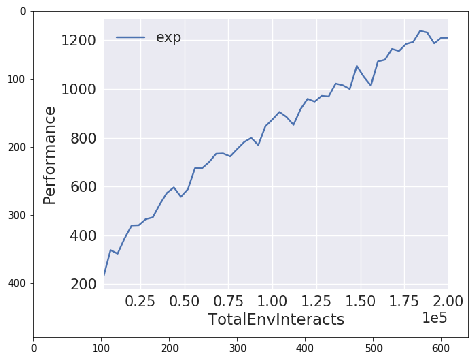

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
I = cv2.imread('books_read-Copy1.png')[..., ::-1]
plt.figure(figsize = (10, 6))
plt.imshow(I)
plt.show()

state value function:

In [ ]:
'''
round 19999, res = 0.85497, table = 
[[ 8.9 16.8 13.7 13.2 10.9]
 [ 8.7 13.6 11.9 11.4  9.9]
 [ 7.8 10.9 10.4  9.9  8.6]
 [ 7.2  9.6  9.5  8.7  7.7]
 [ 6.4  8.7  8.4  7.9  7. ]]
'''